In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
#build the vocabulary
chars = sorted(list(set(' '.join(words))))
print(chars)
print("###")
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(stoi)
print("###")
print(itos)

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
###
{' ': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '.': 0}
###
{1: ' ', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 0: '.'}


In [5]:
#build the dataset

block_size = 3
X, Y = [],[]
i=0
for w in words:
    #print(w)
    context = [0]*block_size
    for ch in w + '.':
        #print(ch)
        #print(context)
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print("###")
        #print(X)
        #print(Y)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        i+=1
print(i)        
X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)


228146
torch.Size([228146, 3]) torch.Size([228146])


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C = torch.randn((27, 2))

In [8]:
C

tensor([[-1.2413, -1.0206],
        [ 0.1264,  0.2897],
        [ 1.9983, -0.2222],
        [-0.8240,  0.0853],
        [ 1.6503, -0.4512],
        [-0.1931,  0.2973],
        [ 0.5934,  0.4695],
        [-0.7992, -1.0664],
        [-0.8231, -0.1529],
        [ 1.2606, -0.8543],
        [-1.4004, -0.8484],
        [ 0.2677, -0.7178],
        [ 0.5245, -1.1528],
        [ 1.3175,  0.7068],
        [-0.4144,  0.1842],
        [-1.0094, -0.5254],
        [ 1.2834, -0.2772],
        [-0.6623, -0.0206],
        [-2.0011, -0.2723],
        [ 3.2064, -0.3073],
        [ 0.6703, -1.3274],
        [-1.1628,  1.3953],
        [ 0.1318,  0.1884],
        [ 0.6718,  1.6378],
        [ 0.4125,  0.0114],
        [-1.3878,  0.1033],
        [ 0.0363,  0.0109]])

In [9]:
X.shape, C.shape

(torch.Size([228146, 3]), torch.Size([27, 2]))

In [10]:
max_index = Y.max().item()
print("Max index in Y:", max_index)

Max index in Y: 27


In [11]:
X = torch.clamp(X, max=C.size(0) - 1)
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [12]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [13]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (684438x2 and 6x100)

In [14]:
emb.view(-1,6).shape, W1.shape, (emb.view(-1,6)@W1+b1).shape

(torch.Size([228146, 6]), torch.Size([6, 100]), torch.Size([228146, 100]))

In [15]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [16]:
h

tensor([[-0.1323,  0.9516, -0.5423,  ..., -1.0000,  0.3323,  0.9771],
        [-0.9999,  0.7384, -0.5930,  ..., -1.0000,  0.9926,  0.9999],
        [-0.9996, -0.6180, -0.5620,  ..., -0.9992,  0.0875, -0.3999],
        ...,
        [-0.9684,  0.9550,  0.2609,  ..., -0.9957,  0.7926,  0.7903],
        [-0.9684,  0.9550,  0.2609,  ..., -0.9957,  0.7926,  0.7903],
        [-0.9603,  0.9724,  0.9636,  ..., -0.9861,  0.8808,  0.9089]])

In [17]:
h.shape

torch.Size([228146, 100])

In [18]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [19]:
logits = h @ W2 + b2

In [20]:
logits.shape

torch.Size([228146, 27])

In [21]:
counts = logits.exp()

In [22]:
counts.shape

torch.Size([228146, 27])

In [23]:
prob = counts / counts.sum(1, keepdims=True)

In [24]:
prob.shape

torch.Size([228146, 27])

In [25]:
prob[0].sum()

tensor(1.0000)

In [26]:
Y

tensor([ 6, 14, 14,  ..., 27, 25,  0])

In [27]:
Y = torch.clamp(Y, max=C.size(0) - 1)

In [28]:
prob[torch.arange(228146), Y]

tensor([7.2379e-10, 1.2422e-09, 1.7856e-09,  ..., 3.2814e-11, 8.3012e-06,
        1.0033e-03])

In [29]:
loss = -prob[torch.arange(228146), Y].log().mean()
loss

tensor(14.7017)

In [30]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [90]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [91]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [96]:
for p in parameters:
  p.requires_grad = True

In [35]:
for _ in range(10):
    #forward pass
    emb = C[X] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) 
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    #backward pass
    for p in parameters:
      p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1 * p.grad

9.772403717041016
9.45301628112793
9.160433769226074
8.891226768493652
8.642862319946289
8.413161277770996
8.200119972229004
8.001935958862305
7.817039966583252
7.643984317779541


In [42]:
lre = torch.linspace(-3, 0, 1000) #0.001 to 1
lrs = 10**lre

In [93]:
#minibatch for optimisation and learning rates
lri=[]
lossi = []

for i in range(10000):
    ix = torch.randint(0,X.shape[0], (32,))
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
      p.grad = None
    loss.backward()
    #update
    #lr=lrs[i]
    for p in parameters:
        p.data += -0.1 * p.grad
    #track statst
    #lri.append(lre[i])
    #lossi.append(loss.item())

In [94]:
emb = C[X] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) 
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4954, grad_fn=<NllLossBackward0>)

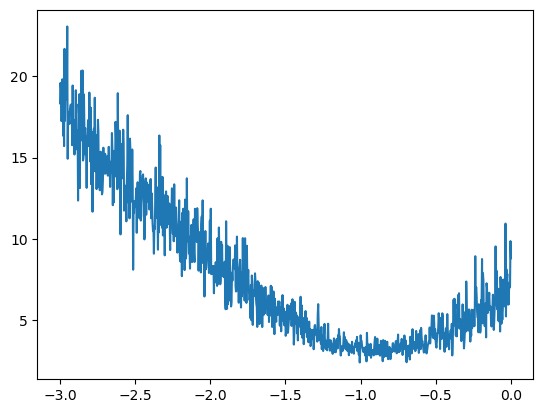

In [48]:
plt.plot(lri, lossi)

In [86]:
# build the training and test splits
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [88]:
n1

25626

In [89]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [110]:
Xtr = torch.clamp(Xtr, max=C.size(0) - 1)
Ytr = torch.clamp(Ytr, max=C.size(0) - 1)
Xdev = torch.clamp(Xdev, max=C.size(0) - 1)
Ydev = torch.clamp(Ydev, max=C.size(0) - 1)
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [126]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [127]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [128]:
for p in parameters:
  p.requires_grad = True
lri=[]
lossi = []
stepi= []


In [136]:
#minibatch for optimisation and learning rates

for i in range(200000):
    ix = torch.randint(0,Xtr.shape[0], (32,))
    #forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
      p.grad = None
    loss.backward()
    #update
    #lr=lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    #track statst
    stepi.append(i)
    #lri.append(lre[i])
    lossi.append(loss.log10().item())

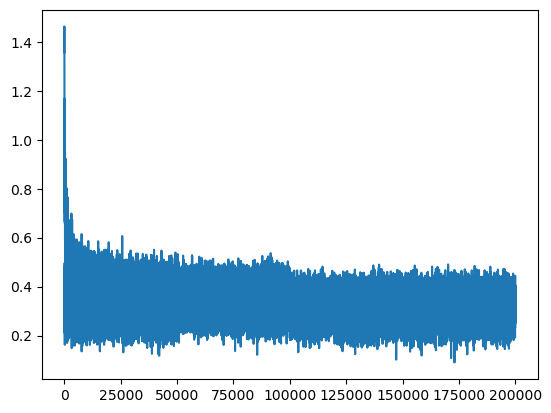

In [137]:
plt.plot(stepi,lossi)

In [107]:
print(loss.item())

2.2214691638946533


In [138]:
#evaluate on the dev set

emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1518, grad_fn=<NllLossBackward0>)

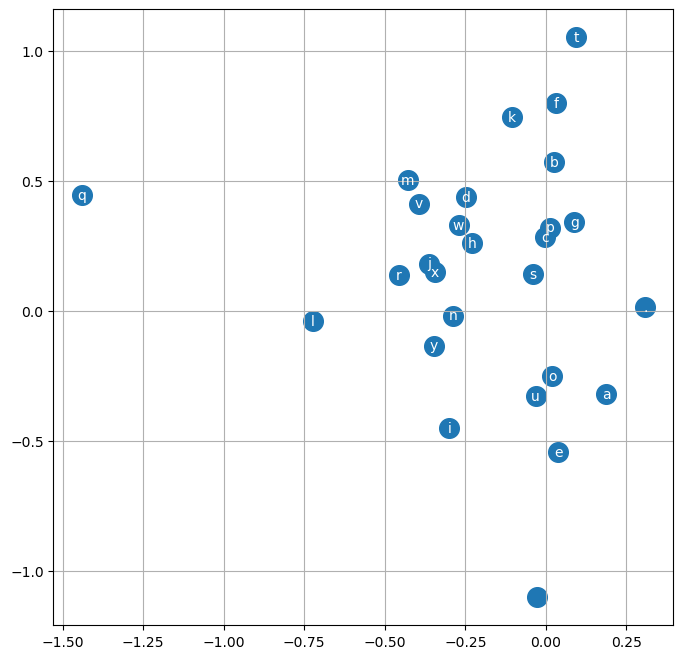

In [121]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [139]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [140]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

bailyge.
saigiore.
haky.
preslemikendyn.
lyn.
amelodie.
shandah.
maylee.
sylyn.
antreliya.
galie.
hayparis.
rani.
aleighaphvinden.
cielly.
wes.
diontrosari.
dan.
aadhie.
gire.
